<a href="https://colab.research.google.com/github/GetKhanAdil/DataScience/blob/main/intern_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Global Terrorism

## Task 4 by Adil Khan

###### Jamia Millia Islamia , New Delhi

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly_express as px
from wordcloud import WordCloud

In [ ]:
pd.set_option("display.max_column",135)

In [ ]:
df=pd.read_csv("globalterrorism.csv",encoding="latin1",)
df.head(2)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   

            city   latitude  longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792 -69.951164          1.0         0      NaN   
1    Mexico city  19.371887 -99.086624          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   

   multiple  success  suicide  attacktype1              attacktype1_txt  \
0       0.0        1        0            1                Assassination   
1       0.0        1        0            6  Hostage Taking (Kidnapping)   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   

  corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3  \
0   NaN     NaN      NaN         NaN        NaN           NaN           NaN   
1   NaN     NaN      NaN         NaN        NaN           NaN           NaN   

  targsubtype3_txt corp3 target3  natlty3 natlty3_txt  \
0              NaN   NaN     NaN      NaN         NaN   
1              NaN   NaN     NaN      NaN         NaN   

                                gname gsubname gname2 gsubname2 gname3  \
0                              MANO-D      NaN    NaN       NaN    NaN   
1  23rd of September Communist League      NaN    NaN       NaN    NaN   

  gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  \
0       NaN    NaN          0.0          NaN          NaN           0     NaN   
1       NaN    NaN          0.0          NaN          NaN           0     7.0   

   nperpcap  claimed  claimmode claimmode_txt  claim2  claimmode2  \
0       NaN      NaN        NaN           NaN     NaN         NaN   
1       NaN      NaN        NaN           NaN     NaN         NaN   

  claimmode2_txt  claim3  claimmode3 claimmode3_txt  compclaim  weaptype1  \
0            NaN     NaN         NaN            NaN        NaN         13   
1            NaN     NaN         NaN            NaN        NaN         13   

  weaptype1_txt  weapsubtype1 weapsubtype1_txt  weaptype2 weaptype2_txt  \
0       Unknown           NaN              NaN        NaN           NaN   
1       Unknown           NaN              NaN        NaN           NaN   

   weapsubtype2 weapsubtype2_txt  weaptype3 weaptype3_txt  weapsubtype3  \
0           NaN              NaN        NaN           NaN           NaN   
1           NaN              NaN        NaN           NaN           NaN   

  weapsubtype3_txt  weaptype4 weaptype4_txt  weapsubtype4 weapsubtype4_txt  \
0              NaN        NaN           Na

In [ ]:
df.shape

(181691, 135)

In [ ]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region',
                  'attacktype1_txt':'AttackType','target1':'Target','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                  'gname':'Group','weaptype1_txt':'Weapon','nkill':'Killed','nwound':'Wounded'},inplace=True)

In [ ]:
df.head(2)

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   

              Country  region                       Region    State  \
0  Dominican Republic       2  Central America & Caribbean      NaN   
1              Mexico       1                North America  Federal   

            city   latitude  longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792 -69.951164          1.0         0      NaN   
1    Mexico city  19.371887 -99.086624          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   

   multiple  success  suicide  attacktype1                   AttackType  \
0       0.0        1        0            1                Assassination   
1       0.0        1        0            6  Hostage Taking (Kidnapping)   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   

                    TargetType  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   

                                       TargetSubType  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                         corp1                   Target  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   

  corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3  \
0   NaN     NaN      NaN         NaN        NaN           NaN           NaN   
1   NaN     NaN      NaN         NaN        NaN           NaN           NaN   

  targsubtype3_txt corp3 target3  natlty3 natlty3_txt  \
0              NaN   NaN     NaN      NaN         NaN   
1              NaN   NaN     NaN      NaN         NaN   

                                Group gsubname gname2 gsubname2 gname3  \
0                              MANO-D      NaN    NaN       NaN    NaN   
1  23rd of September Communist League      NaN    NaN       NaN    NaN   

  gsubname3 motive  guncertain1  guncertain2  guncertain3  individual  nperps  \
0       NaN    NaN          0.0          NaN          NaN           0     NaN   
1       NaN    NaN          0.0          NaN          NaN           0     7.0   

   nperpcap  claimed  claimmode claimmode_txt  claim2  claimmode2  \
0       NaN      NaN        NaN           NaN     NaN         NaN   
1       NaN      NaN        NaN           NaN     NaN         NaN   

  claimmode2_txt  claim3  claimmode3 claimmode3_txt  compclaim  weaptype1  \
0            NaN     NaN         NaN            NaN        NaN         13   
1            NaN     NaN         NaN            NaN        NaN         13   

    Weapon  weapsubtype1 weapsubtype1_txt  weaptype2 weaptype2_txt  \
0  Unknown           NaN              NaN        NaN           NaN   
1  Unknown           NaN              NaN        NaN           NaN   

   weapsubtype2 weapsubtype2_txt  weaptype3 weaptype3_txt  weapsubtype3  \
0           NaN              NaN        NaN           NaN           NaN   
1           NaN              NaN        NaN           NaN           NaN   

  weapsubtype3_txt  weaptype4 weaptype4_txt  weapsubtype4 weapsubtype4_txt  \
0              NaN        NaN           NaN           NaN            

In [ ]:
df1=df[['Year','Month','Day','Country','State','Region','AttackType','Target','TargetType','TargetSubType','Group','Weapon','Killed','Wounded','success']]

In [ ]:
df1.head(2)

Year  Month  Day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   

                    AttackType                   Target  \
0                Assassination             Julio Guzman   
1  Hostage Taking (Kidnapping)  Nadine Chaval, daughter   

                    TargetType  \
0  Private Citizens & Property   
1      Government (Diplomatic)   

                                       TargetSubType  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                                Group   Weapon  Killed  Wounded  success  
0                              MANO-D  Unknown     1.0      0.0        1  
1  23rd of September Communist League  Unknown     0.0      0.0        1

In [ ]:
df1.shape

(181691, 15)

In [ ]:
df1.isna().sum()

Year                 0
Month                0
Day                  0
Country              0
State              421
Region               0
AttackType           0
Target             636
TargetType           0
TargetSubType    10373
Group                0
Weapon               0
Killed           10313
Wounded          16311
success              0
dtype: int64

In [ ]:
df1.shape

(181691, 15)

In [ ]:
print("State with Max No. of attack ==>",df1.State.value_counts().idxmax()," With",df1.State.value_counts().max(),"attcks")
print("Year with Max No. of attack ==>",df1.Year.value_counts().idxmax()," With",df1.Year.value_counts().max(),"attcks")
print("Group with Max No. of attack ==>",df1.Group.value_counts().idxmax()," With",df1.Group.value_counts().max(),"attcks")
print("Most attack type ==>",df1.AttackType.value_counts().idxmax()," With",df1.AttackType.value_counts().max(),"attcks")

State with Max No. of attack ==> Baghdad  With 7645 attcks
Year with Max No. of attack ==> 2014  With 16903 attcks
Group with Max No. of attack ==> Unknown  With 82782 attcks
Most attack type ==> Bombing/Explosion  With 88255 attcks


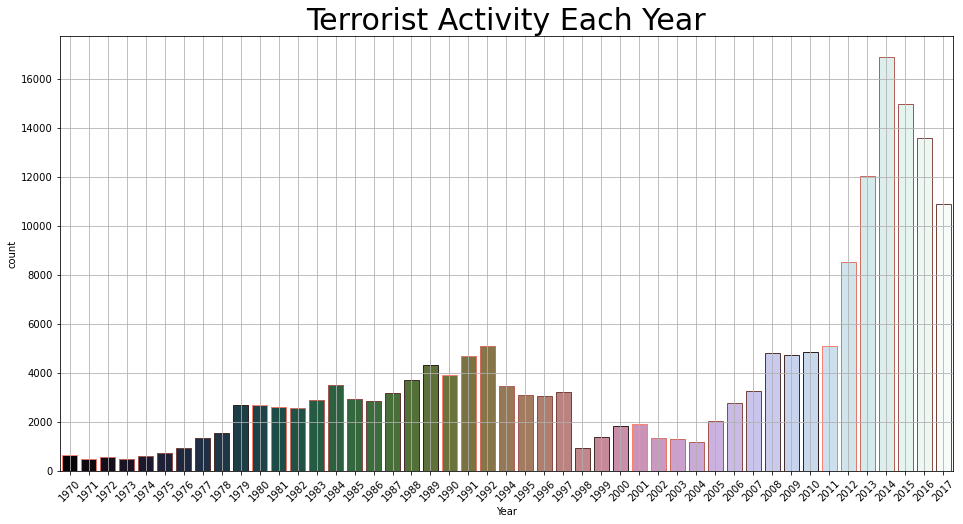

In [ ]:
plt.figure(figsize=[16,8])
plt.title("Terrorist Activity Each Year",fontsize=30)
sns.countplot(x='Year',data=df1,palette="cubehelix",edgecolor=sns.color_palette("dark:salmon_r",10))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
df1.State.value_counts()[:20]

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

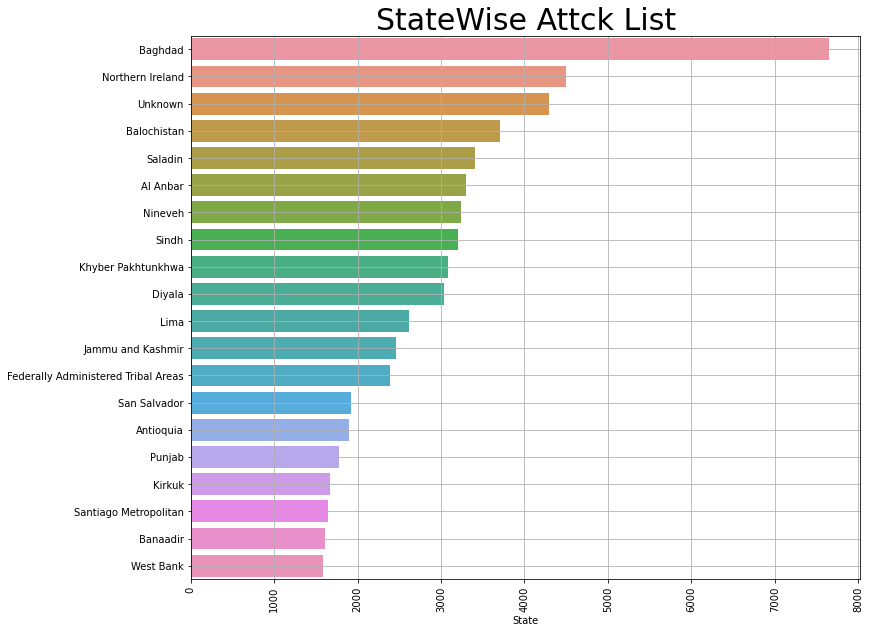

In [ ]:
plt.figure(figsize=[12,10])
plt.title("StateWise Attck List",fontsize=30)
sns.barplot(y=df1.State.value_counts()[:20].index,x=df1.State.value_counts()[:20])

plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
df1.Group.value_counts()[:20]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

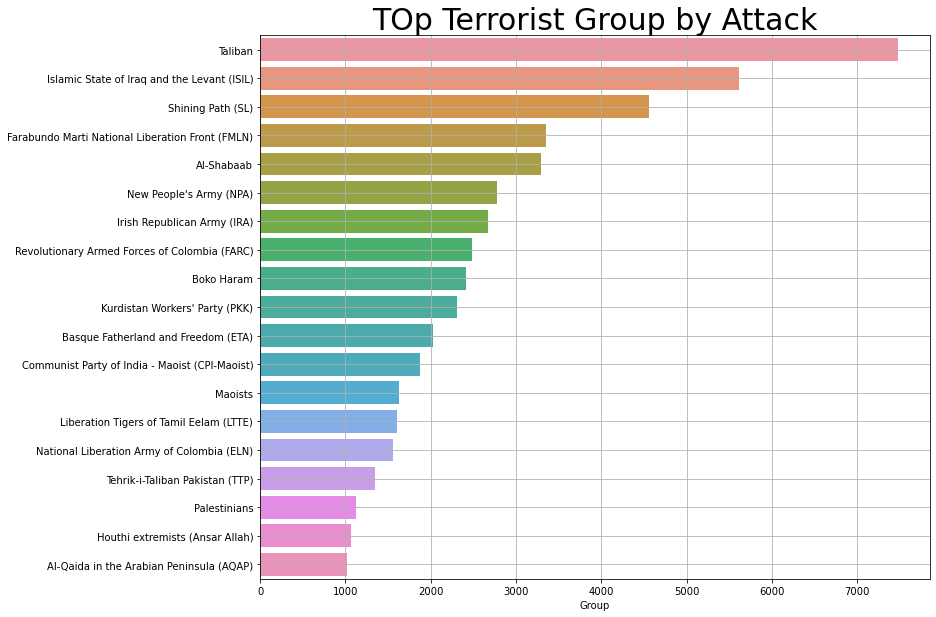

In [ ]:
plt.figure(figsize=[12,10])
plt.title("TOp Terrorist Group by Attack",fontsize=30)
sns.barplot(y=df1.Group.value_counts()[1:20].index,x=df1.Group.value_counts()[1:20])
# plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
df1.AttackType.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

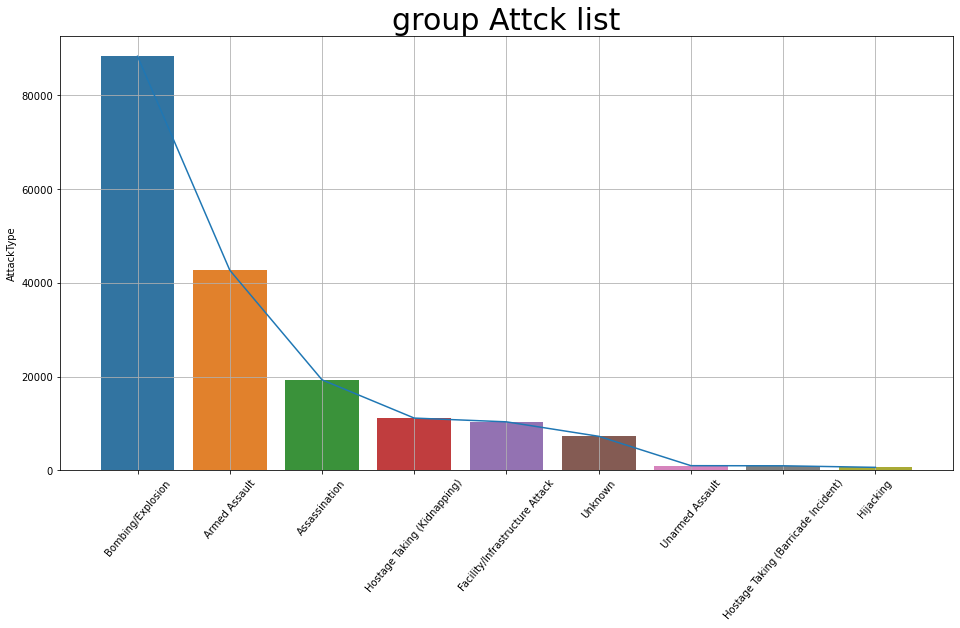

In [ ]:
plt.figure(figsize=[16,8])
plt.title("group Attck list",fontsize=30)
sns.barplot(x=df1.AttackType.value_counts()[:20].index,y=df1.AttackType.value_counts()[:20])
sns.lineplot(x=df1.AttackType.value_counts()[:20].index,y=df1.AttackType.value_counts()[:20])

plt.xticks(rotation=50)
plt.grid()
plt.show()

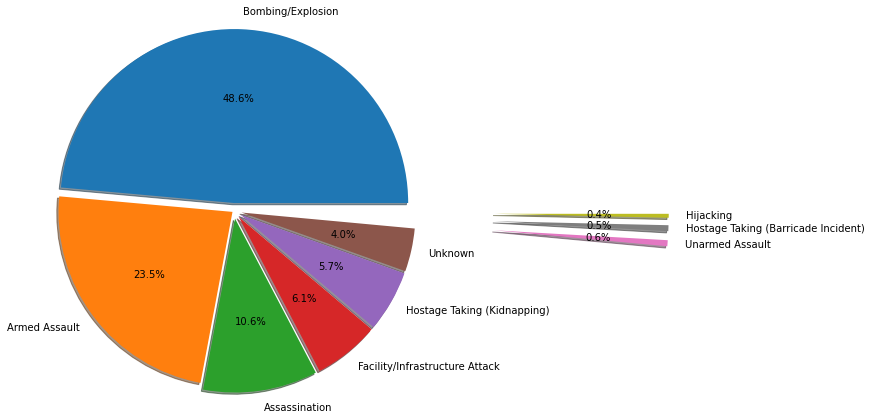

In [ ]:
plt.pie(df1.AttackType.value_counts(),labels=("Bombing/Explosion","Armed Assault","Assassination","Facility/Infrastructure Attack","Hostage Taking (Kidnapping)",
                              "Unknown","Unarmed Assault","Hostage Taking (Barricade Incident)","Hijacking"),autopct="%.1f%%",
        radius=2,shadow=True,explode=[.09,.02,.09,.09,.09,.09,3,3,3])

plt.show()

                           Attack Type Percentage

# Max Attack Type by Terrorist is Bombing/Explosion (48.6%)

In [ ]:
df1.shape

(181691, 15)

In [ ]:
df1.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

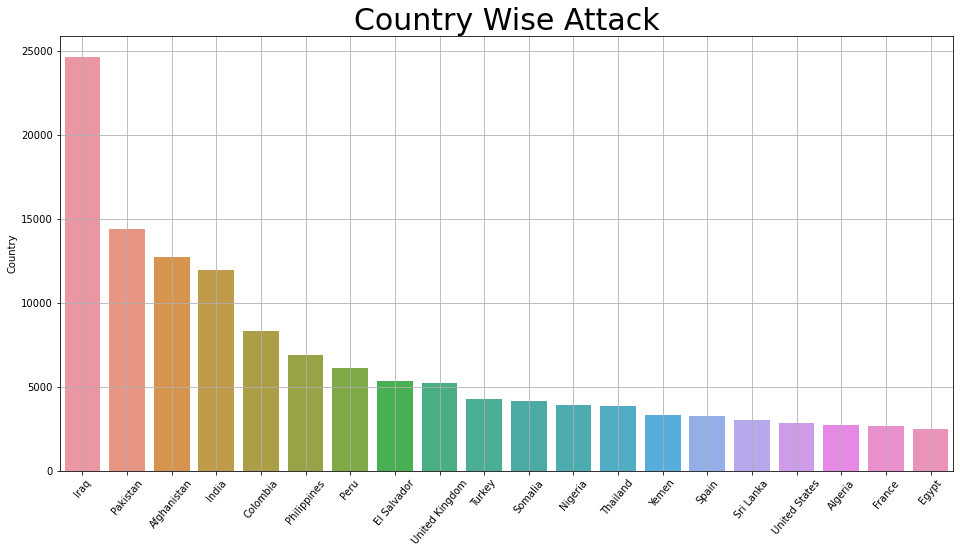

In [ ]:
plt.figure(figsize=[16,8])
plt.title("Country Wise Attack",fontsize=30)
sns.barplot(x=df1.Country.value_counts()[:20].index,y=df1.Country.value_counts()[:20])
plt.xticks(rotation=50)
plt.grid()
plt.show()

In [ ]:
pi=pd.pivot_table(index='Country',values='Killed',aggfunc="sum",data=df1).sort_values(by='Killed',ascending=False)
aa=pi[:10]
aa

Killed
Country             
Iraq         78589.0
Afghanistan  39384.0
Pakistan     23822.0
Nigeria      22682.0
India        19341.0
Sri Lanka    15530.0
Syria        15229.0
Colombia     14698.0
Peru         12771.0
El Salvador  12053.0

<AxesSubplot:title={'center':'Country with Most of People killed'}, ylabel='Country'>

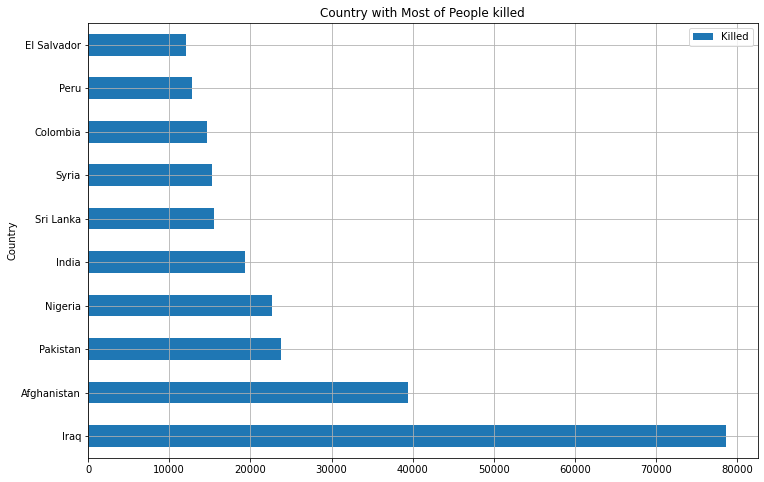

In [ ]:
aa.plot(kind='barh',figsize=(12,8),title="Country with Most of People killed",grid=True)

# Here is the Top 10 Countries where people killed most

aa=df1.State.value_counts()[:20].index
aa

In [ ]:
pi=pd.pivot_table(index='Group',values='Killed',aggfunc="sum",data=df1).sort_values(by='Killed',ascending=False)
aaa=pi[1:10]
aaa

Killed
Group                                                    
Islamic State of Iraq and the Levant (ISIL)       38923.0
Taliban                                           29410.0
Boko Haram                                        20328.0
Shining Path (SL)                                 11601.0
Liberation Tigers of Tamil Eelam (LTTE)           10989.0
Al-Shabaab                                         9330.0
Farabundo Marti National Liberation Front (FMLN)   8065.0
Nicaraguan Democratic Force (FDN)                  6662.0
Tehrik-i-Taliban Pakistan (TTP)                    6042.0

<AxesSubplot:ylabel='Group'>

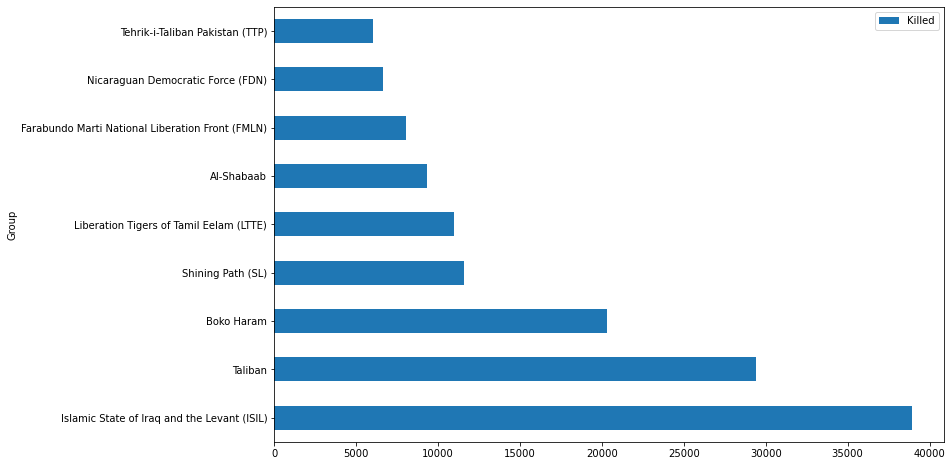

In [ ]:
aaa.plot(kind='barh',stacked=True,figsize=(12,8))

#              Top 10 Group who Killed Max No. of People

In [ ]:
yr=pd.pivot_table(index='Year',values='Killed',aggfunc="sum",data=df1).sort_values(by='Year',ascending=False)
yr[:5]

Killed
Year         
2017  26445.0
2016  34871.0
2015  38853.0
2014  44490.0
2013  22273.0

<AxesSubplot:title={'center':'People killed in Year'}, xlabel='Year'>

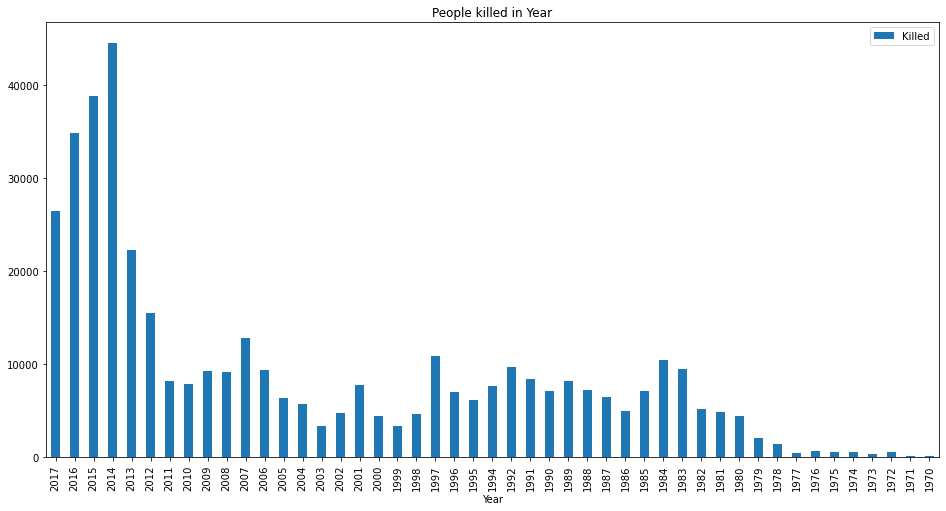

In [ ]:
yr.plot(kind='bar',stacked=True,figsize=(16,8),title="People killed in Year")

# Here we see that Max people Killed in Year 2014 with No. 44490

In [ ]:
df1.head()

Year  Month  Day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

                       AttackType                   Target  \
0                   Assassination             Julio Guzman   
1     Hostage Taking (Kidnapping)  Nadine Chaval, daughter   
2                   Assassination                 Employee   
3               Bombing/Explosion             U.S. Embassy   
4  Facility/Infrastructure Attack           U.S. Consulate   

                    TargetType  \
0  Private Citizens & Property   
1      Government (Diplomatic)   
2          Journalists & Media   
3      Government (Diplomatic)   
4      Government (Diplomatic)   

                                       TargetSubType  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                                Group      Weapon  Killed  Wounded  success  
0                              MANO-D     Unknown     1.0      0.0        1  
1  23rd of September Communist League     Unknown     0.0      0.0        1  
2                             Unknown     Unknown     1.0      0.0        1  
3                             Unknown  Explosives     NaN      NaN        1  
4                             Unknown  Incendiary     NaN      NaN        1

In [ ]:
(df1.TargetSubType.value_counts()[:5])

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Name: TargetSubType, dtype: int64

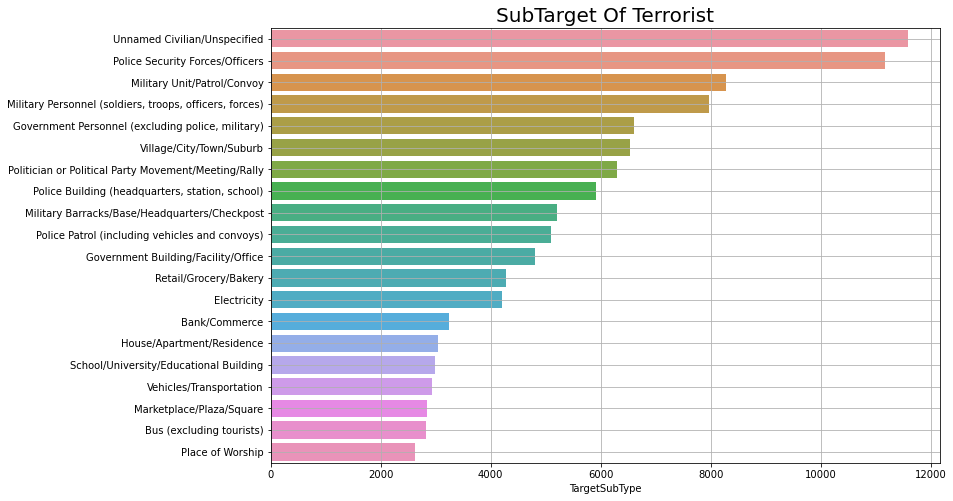

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(y=df1.TargetSubType.value_counts()[:20].index,x=df1.TargetSubType.value_counts()[:20])
plt.title("SubTarget Of Terrorist",fontsize=(20))
plt.grid()
plt.show()

# We See Max Attack is on Unnamed Civilian & Police Security Forces 

In [ ]:
(df1.TargetType.value_counts()[:5])

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: TargetType, dtype: int64

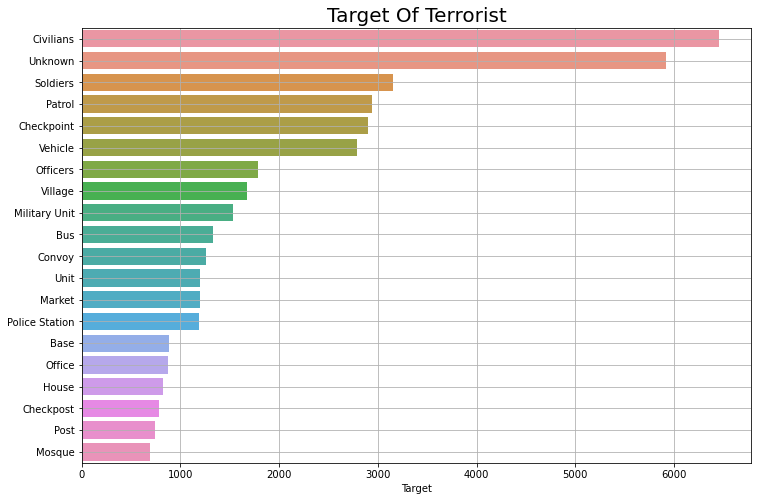

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(y=df1.Target.value_counts()[:20].index,x=df1.Target.value_counts()[:20])
plt.title("Target Of Terrorist",fontsize=(20))
plt.grid()
plt.show()

# Max Target of Terrorist Is Civilians

In [ ]:
sucess=df1.success.value_counts()
sucess

1    161632
0     20059
Name: success, dtype: int64

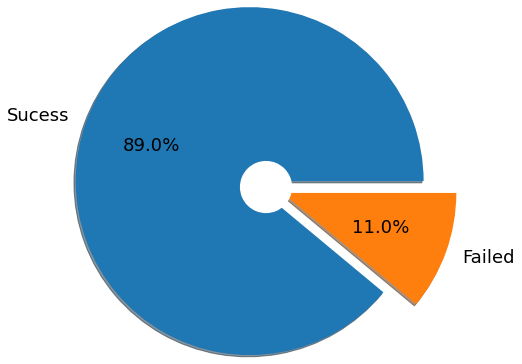

In [ ]:
plt.pie(sucess,labels=("Sucess","Failed"),autopct='%.1f%%',radius=2,explode=[.2,.2],
        shadow=True,textprops={'fontsize': 18})
plt.pie([1],colors=['w'],radius=.3)
plt.show()

 # 89% of Attack By Terrorist were Sucessfull

In [ ]:
kill=df1.Killed.sum()
wound=df1.Wounded.sum()
t=kill+wound

kill/t,wound/t
t

935737.0

In [ ]:
total=[411868.0,523869.0]
type[total]

type[[411868.0, 523869.0]]

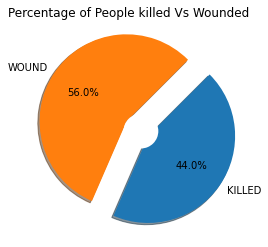

In [ ]:
plt.title("Percentage of People killed Vs Wounded",loc="right")
plt.pie(total,labels=("KILLED","WOUND"),autopct='%.1f%%',radius=1,explode=[.1,.2],
        shadow=True,textprops={'fontsize': 10},counterclock=False,startangle=45)
plt.pie([1],colors=['w'],radius=.2)
plt.show()

  No of People Effect By Terrorist Activity all around world is 935737.0


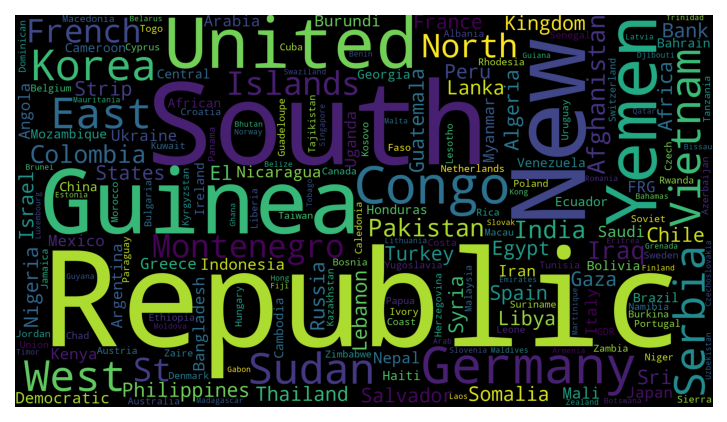

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='Black',width=1920,height=1080).generate(" ".join(df.Country.value_counts().index))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 

# INDIA Specific Analysis

In [ ]:
India=df1[df1.Country=="India"]
India.head(2)

Year  Month  Day Country  State      Region         AttackType  \
1186  1972      2   22   India  Delhi  South Asia          Hijacking   
2764  1975      1    2   India  Bihar  South Asia  Bombing/Explosion   

                                     Target            TargetType  \
1186                                  B-747   Airports & Aircraft   
2764  Lalit Narayan Mishra and a legislator  Government (General)   

                                          TargetSubType         Group  \
1186                       Aircraft (not at an airport)  Palestinians   
2764  Government Personnel (excluding police, military)  Ananda Marga   

          Weapon  Killed  Wounded  success  
1186  Explosives     0.0      0.0        1  
2764  Explosives     4.0      0.0        1

In [ ]:
plt.figure(figsize=[15,10])
px.scatter_matrix(India,title="Terrorism Record In India ",dimensions=["Year","success","Wounded","Killed"],color="State")

<Figure size 1080x720 with 0 Axes>

# Here is the state wise reprensetation of India

# 

In [ ]:
print("State with Max No. of attack ==>",India.State.value_counts().idxmax()," With",India.State.value_counts().max(),"attcks")
print("Year with Max No. of attack ==>",India.Year.value_counts().idxmax()," With",India.Year.value_counts().max(),"attcks")
print("Group with Max No. of attack ==>",India.Group.value_counts().idxmax()," With",India.Group.value_counts().max(),"attcks")
print("Most attack type ==>",India.AttackType.value_counts().idxmax()," With",India.AttackType.value_counts().max(),"attcks")

State with Max No. of attack ==> Jammu and Kashmir  With 2454 attcks
Year with Max No. of attack ==> 2016  With 1025 attcks
Group with Max No. of attack ==> Unknown  With 4263 attcks
Most attack type ==> Bombing/Explosion  With 4825 attcks


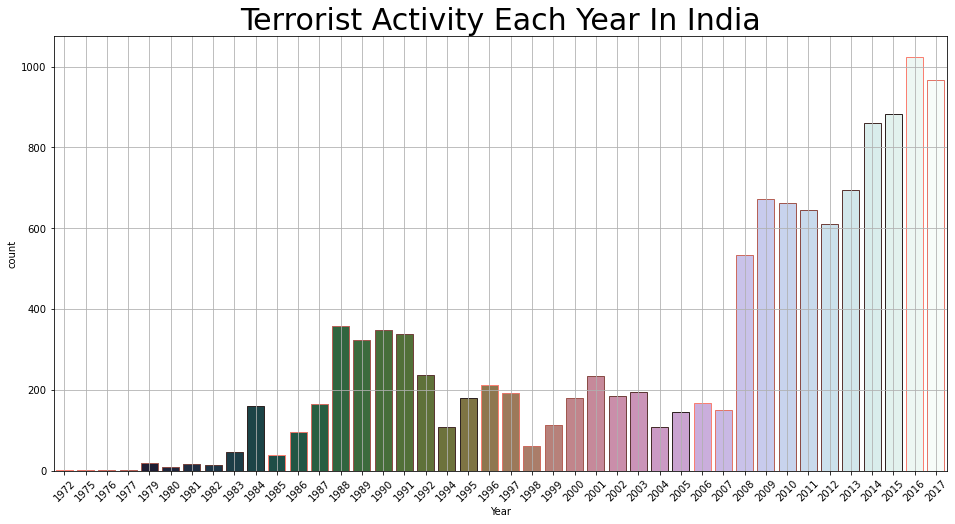

In [ ]:
plt.figure(figsize=[16,8])
plt.title("Terrorist Activity Each Year In India",fontsize=30)
sns.countplot(x='Year',data=India,palette="cubehelix",edgecolor=sns.color_palette("dark:salmon_r",10))
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
India.State.value_counts()[:5]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Name: State, dtype: int64

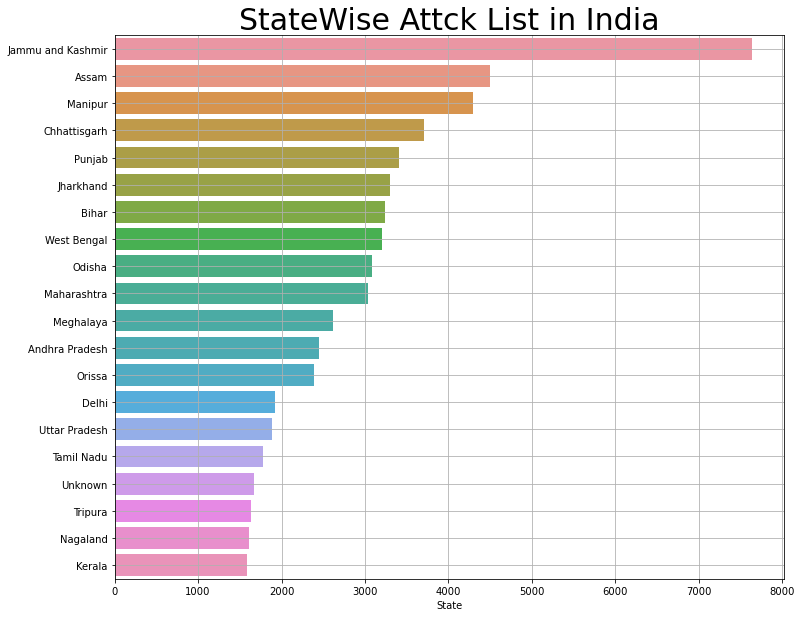

In [ ]:
plt.figure(figsize=[12,10])
plt.title("StateWise Attck List in India",fontsize=30)
sns.barplot(y=India.State.value_counts()[:20].index,x=df1.State.value_counts()[:20])
plt.grid()
plt.show()

## max no. of attack is in J&k

In [ ]:
India.Group.value_counts()[1:4]

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
Name: Group, dtype: int64

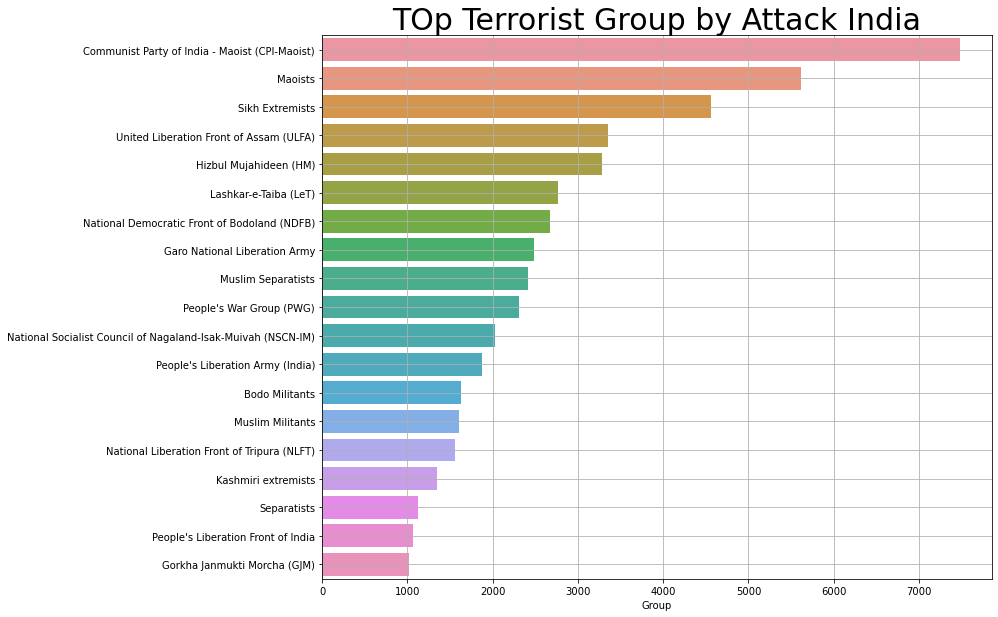

In [ ]:
plt.figure(figsize=[12,10])
plt.title("TOp Terrorist Group by Attack India",fontsize=30)
sns.barplot(y=India.Group.value_counts()[1:20].index,x=df1.Group.value_counts()[1:20])
plt.grid()
plt.show()

# Communist Party of India - Maoist (CPI-Maoist) Involve in Most attack carried In india with total no.==>1877

In [ ]:
India.AttackType.value_counts()[:20]

Bombing/Explosion                      4825
Armed Assault                          3184
Assassination                          1229
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          996
Unknown                                 312
Unarmed Assault                         143
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: AttackType, dtype: int64

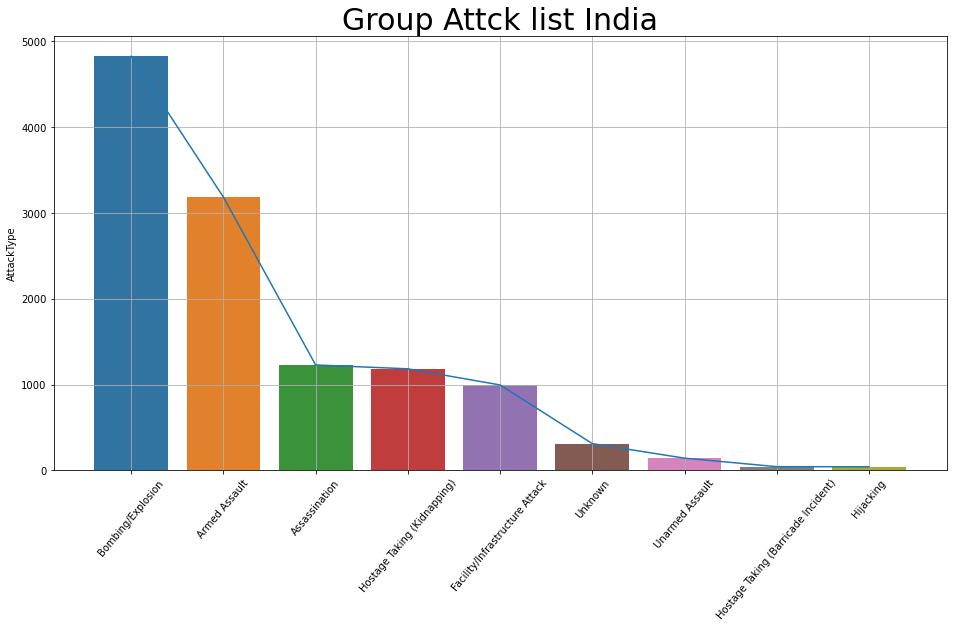

In [ ]:
plt.figure(figsize=[16,8])
plt.title("Group Attck list India",fontsize=30)
sns.barplot(x=India.AttackType.value_counts()[:20].index,y=India.AttackType.value_counts()[:20])
sns.lineplot(x=India.AttackType.value_counts()[:20].index,y=India.AttackType.value_counts()[:20])

plt.xticks(rotation=50)
plt.grid()
plt.show()

# Bombing Is Used Most of the time with Count 4825

# 

In [ ]:
india_kill=India.Killed.sum()
india_wound=India.Wounded.sum()
india_total=India.Killed.sum()+India.Wounded.sum()
kill_per=india_kill/india_total
wound_per=india_wound/india_total

In [ ]:
india_total

48321.0

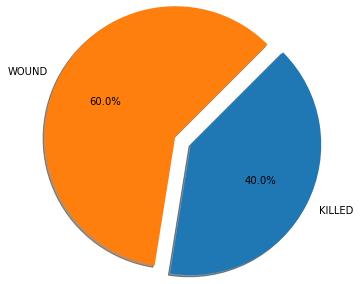

In [ ]:
plt.pie(ind,labels=("KILLED","WOUND"),autopct='%.1f%%',radius=1.5,explode=[.1,.1],
        shadow=True,textprops={'fontsize': 10},counterclock=False,startangle=45)
plt.show()

# People Killed Vs People wounded in India
# Total people effected 48321.0

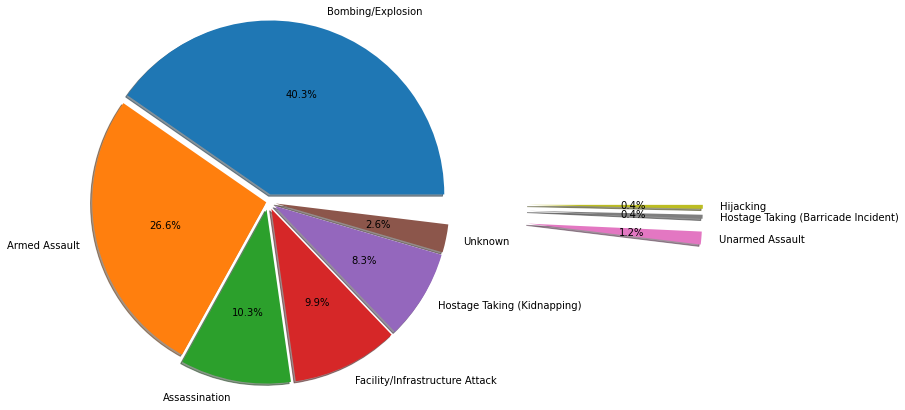

In [ ]:
plt.pie(India.AttackType.value_counts(),labels=("Bombing/Explosion","Armed Assault","Assassination","Facility/Infrastructure Attack","Hostage Taking (Kidnapping)",
                              "Unknown","Unarmed Assault","Hostage Taking (Barricade Incident)","Hijacking"),autopct="%.1f%%",
        radius=2,shadow=True,explode=[.09,.02,.09,.09,.09,.09,3,3,3])

plt.show()

# 

In [ ]:
I=pd.pivot_table(index='Year',values='Killed',aggfunc="sum",data=India).sort_values(by='Year',ascending=False)
I.max()

Killed    1152.0
dtype: float64

<AxesSubplot:title={'center':'Year Most of People killed'}, xlabel='Year'>

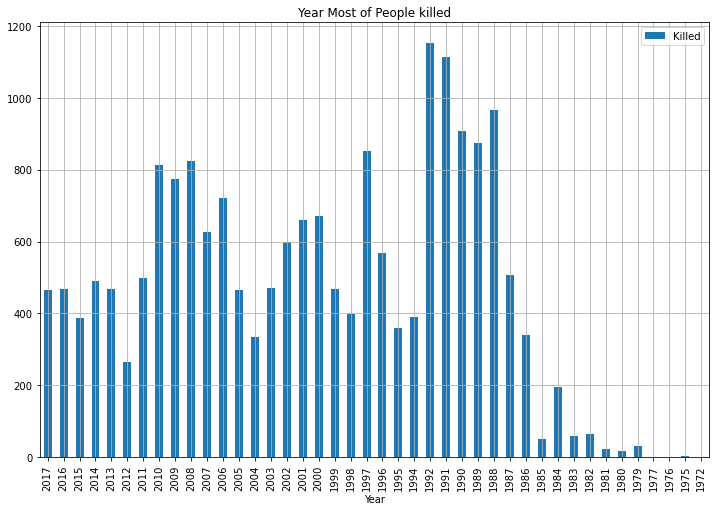

In [ ]:
I.plot(kind='bar',figsize=(12,8),title="Year Most of People killed",grid=True)

 ### In Year 1991 Most people killed by TERRORIST 1152

# 

In [ ]:
p=pd.pivot_table(index='Group',values='Killed',aggfunc="sum",data=India).sort_values(by='Killed',ascending=False)
a=p[1:10]
a

Killed
Group                                                 
Sikh Extremists                                 2477.0
Communist Party of India - Maoist (CPI-Maoist)  2344.0
Lashkar-e-Taiba (LeT)                            969.0
Maoists                                          790.0
United Liberation Front of Assam (ULFA)          617.0
National Democratic Front of Bodoland (NDFB)     514.0
People's War Group (PWG)                         410.0
Hizbul Mujahideen (HM)                           409.0
Naxalites                                        408.0

<AxesSubplot:title={'center':'Group who killed Max People'}, ylabel='Group'>

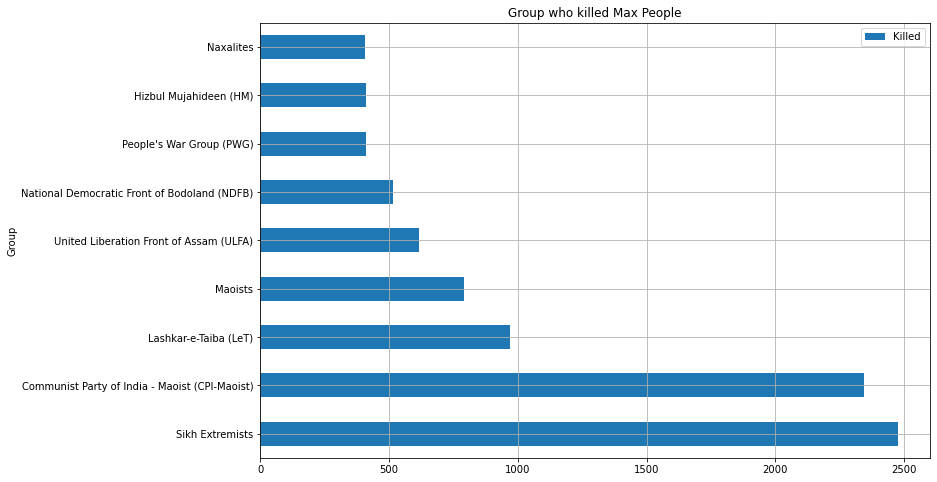

In [ ]:
a.plot(kind='barh',figsize=(12,8),title="Group who killed Max People",grid=True)

# Sikh Extremists  killed max no. of people with 2477 kills

# 

# 

In [ ]:
I1=pd.pivot_table(index='State',values='Killed',aggfunc="sum",data=India).sort_values(by='Killed',ascending=False)
I1[:5]

Killed
State                    
Jammu and Kashmir  4079.0
Punjab             2751.0
Assam              2112.0
Chhattisgarh       1465.0
Maharashtra        1010.0

<AxesSubplot:title={'center':'State wise people Kill list'}, ylabel='State'>

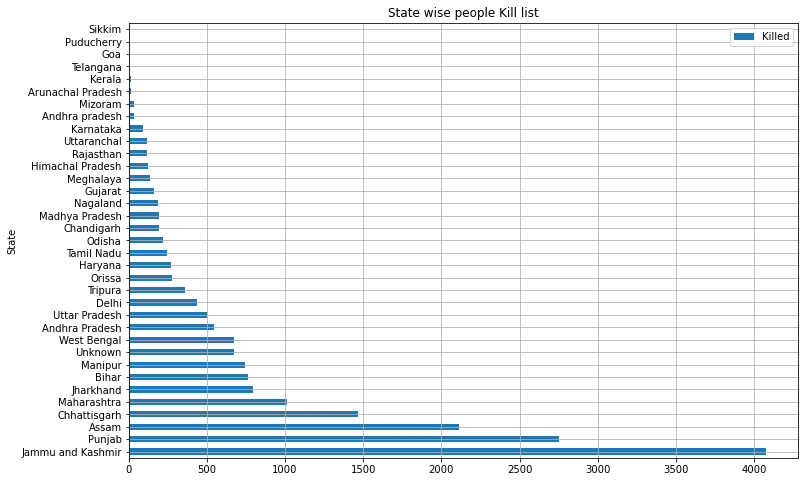

In [ ]:
I1.plot(kind='barh',figsize=(12,8),title="State wise people Kill list",grid=True)

####  In Jammu and Kashmir	4079 killed which is maximun in india

# 

In [ ]:
India.TargetType.value_counts()[:5]

Private Citizens & Property    3144
Police                         2299
Government (General)           1727
Business                       1131
Military                        916
Name: TargetType, dtype: int64

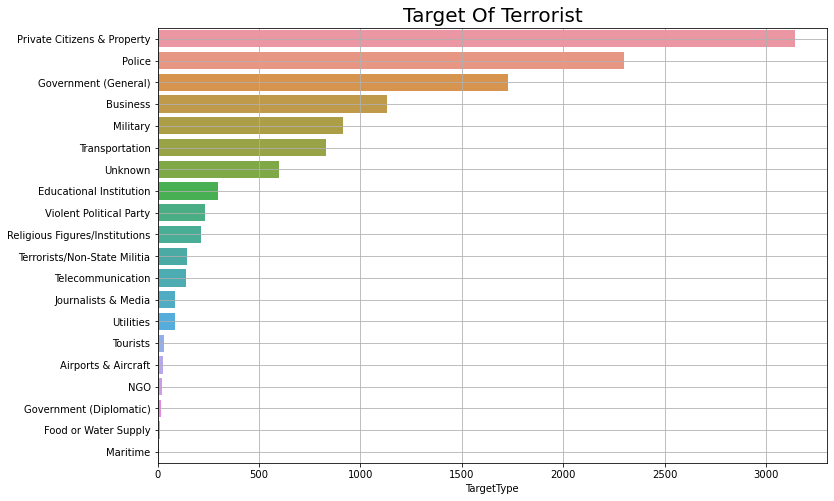

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(y=India.TargetType.value_counts()[:20].index,x=India.TargetType.value_counts()[:20])
plt.title("Target Of Terrorist",fontsize=(20))
plt.grid()
plt.show()

# Terrorist Target Mostly private citizen & property with total attack of 3144 which is around 26%

# 

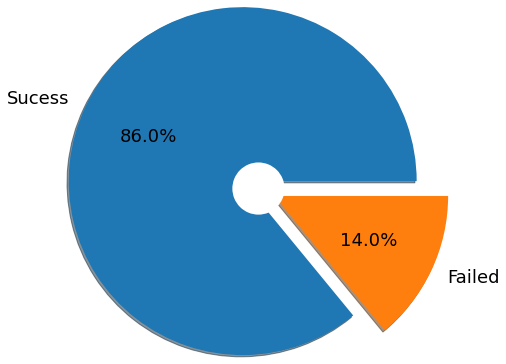

In [ ]:
Sucess=India.success.value_counts()
Sucess
plt.pie(Sucess,labels=("Sucess","Failed"),autopct='%.1f%%',radius=2,explode=[.2,.2],
        shadow=True,textprops={'fontsize': 18})
plt.pie([1],colors=['w'],radius=.3)
plt.show()

# In India 86% of Attack are sucessfull and 14% are Failed

# 
    

# CONCLUSION:-

## AT WORLD LEVEL
#### 1- State with Max No. of attack     ==> Baghdad  With 7645 attcks
#### 2- Year with Max No. of attack      ==> 2014  With 16903 attcks
#### 3- Group with Max No. of attack   ==> Taliban  With 7478 attcks
#### 4- Most attack type                         ==> Bombing/Explosion  With 88255 attcks (48.6%)
#### 5-Country with Max No. of attack ==> Iraq  With 24636 attcks
#### 6- Max No. of attack on Private Citizens & Property with  43511 Attacks
#### 7- 89% of Attack Are Scuessfull With Total Attempt 181691
#### 8- Islamic State of Iraq and the Levant (ISIL)	killed Max no. of people with 38923 kills ,followed by Taliban with killing of 29410
#### 9- Top three country where Max people Killed ,Iraq- 78589,Afghanistan	-39384 ,Pakistan -23822.0
#### 10- No of People Effect By Terrorist Activity all around world is 935737.0 with 44% killed 56% Wounded


# 

#  AT INDIA  LEVEL

#### 1- Top 3 State with Max No. of attack ==> Jammu and Kashmir 2454 ,Assam  1151, Manipur 1100 Attacks
#### 2-Year with Max No. of attack ==> 2016  With 1025 attcks
#### 3-Group with Max No. of attack ==> Communist Party of India - Maoist (CPI-Maoist)  With 1877 attcks
#### 4-Most attack type ==> Bombing/Explosion  With 4825 attcks
#### 5-In 1991 max people killed 1152
#### 6- Max No. of attack on Private Citizens & Property with  3144 Attacks
#### 7- 86% of Attack Are Scuessfull With Total Attempt 11960
#### 8-  Top 3 group killed people are  Sikh Extremists	2477.0,Communist Party of India - Maoist (CPI-Maoist)	2344.0,Lashkar-e-Taiba (LeT)	969.0
#### 9- Top three State where Max people Killed ,Jammu and Kashmir	4079.0,Punjab 2751.0,Assam 2112.0
#### 10- No of People Effect By Terrorist Activity in INDIA is 48321.0.0 with 40% killed 60% Wounded
